# 1. Libraries

In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np

# 2.Coeffiecients

In [2]:
K1T= 0.88 
K2T= -0.016
K3T= -0.3
K4T= 0
s= 0.7 #Altitude factor 
ct = 0.78
Rw = 5.5
Bypass_ratio = 4.8
Static_dry_thrust = 109910
Afterburner_factor = 1 #After burning factor
cruising_M = 0.78
cruising_altitude= 11280
C1 = 0.0009
C2 = 0.79
B = 3.95
H =4.14
L= 37.57
nc = 6
n_p = 164
Fop = 12
chrod_sweep = 0.4363
MTOM = 78000
S = 122.4 
Vd = 180.06
n1= 2.5 
N_bar = 1.65 * n1
C3 = 1.56
T0 = 109910
g =9.81
C4= 0.12
deltap = 75300 * (10**(-5))
ct = 0.78 #Fraction of the wing chord over which the flow is laminar
Rw = 5.5 # Ratio of overall wetted area to reference area
Cl_cruise = 0.78
C_sweep = 0.43633 
Af = 0.93 # Aerofoil correction factor
Tf = 1.15 # Type factor
t_to_c = 0.13  #  Thickness to chord ratio
c_to_t = 1/ t_to_c
S = 122.4 # Wing reference area
lamda = 0.24712 #Taper Ratio
Mn = 0.78 # Cruising M
AR = 10.054 # Aspect ratio
Ne = 0  #Number of engines on top of the wing

delraLET = 1 # Un-stick lift coefficient  increment from leading edge devices
deltaTET = 0.5# Un-stick lift coefficient  increment from trailing edge devices
Ke = 0.1 #powerplant factor
Mass_fuel_max= 24240
Mass_cruise = MTOM - (0.5*Mass_fuel_max)


# 3.Powerplant analytical model 

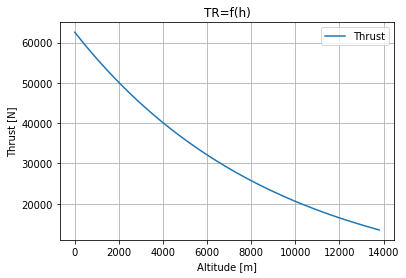

In [3]:
T_values = []
h_VALUES= np.arange(0,14000, 200 )
for h in h_VALUES : 
    density = math.exp(-h/9000)
    tau = Afterburner_factor * (K1T+ (K2T* Bypass_ratio) + (K3T*cruising_M) )* density 
    thrust = tau * Static_dry_thrust 
    T_values.append(thrust)


#Plotting
plt.plot(h_VALUES, T_values, label='Thrust')
plt.xlabel('Altitude [m]')
plt.ylabel('Thrust [N]')
plt.title('TR=f(h)')
plt.grid(True)
plt.legend()
plt.show()

# '4.Drag polar 

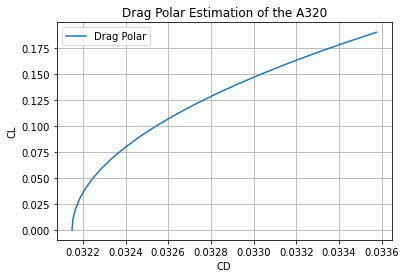

In [4]:
# Calculating the Cd values from the Drag polar equation
tau_bar = ((Rw - 2)/Rw) + (1.9/Rw * (1 + (0.526 *((t_to_c)/0.25)**3)))
FLamda = 0.005 * (1+ (1.5*((lamda-0.6)**2)))

Cd_values =[]
Cl_values= np.arange(0,0.2, 0.01 )
for Cl in Cl_values :    
    Cdz = 0.005 * (1- (2*ct/Rw)) * tau_bar * ( (1- (0.2*Mn)) + (0.12* ((Mn * (((math.cos(C_sweep)))**0.5)  / (Af - (t_to_c)) )**20) ) )* Rw * Tf * (S**0.1)
    Cdi = ( ((1+(0.12*(Mn**6)))/(math.pi * AR)) * (1+ ((0.124 + ((FLamda * AR *((10* t_to_c)**0.33)))/(math.cos(C_sweep)**2))) + ((0.1*((3*Ne)+1))/((4+AR)**0.8)))) * (Cl**2)
    Cd = Cdz + Cdi
    Cd_values.append(Cd)

#Plotting The drag polar
plt.plot(Cd_values, Cl_values, label='Drag Polar')
plt.xlabel('CD')
plt.ylabel('CL')
plt.title('Drag Polar Estimation of the A320')
plt.grid(True)
plt.legend()
plt.show()

# 5. Powerplant analytical model

In [5]:
## Calculating the aircraft mass 
Mfus = 2 * C2 * deltap * (9.75 +(5.84* B) )* ((2*L/(B+H)) - 1.5)*(B+H)**2
Mop = (85* nc) + (Fop *n_p)
Mliftsurface = C1 * (((AR**0.5)*(S**1.5)* (1/math.cos(chrod_sweep))*((1+(2*lamda))/(3+(3*lamda)))* MTOM/S * (N_bar**0.3)*((Vd/t_to_c)**0.5) )**0.9)
Mengine = 2*T0 / (5*g)
Mpowerplant = C3 * Mengine
Msys = C4* MTOM
Mfuel =0
Mpay =0
Mfixed = Mfus + Mop
Mvariable = Mliftsurface + Mpowerplant + Msys  
M0 = Mfixed + Mvariable 
OEM = M0 - Mfuel - Mpay 

## Printing the aircraft mass
print("Fuselage mass : ", Mfus , "kg")
print("operational items mass : ", Mop , "kg")
print("Lifting surfaces  mass : ", Mliftsurface, "kg")
print("Power plant  mass : ", Mpowerplant, "kg")
print("Aircraft system  mass : ", Msys, "kg")
print("Aircraft mass : ", OEM, "kg")

Fuselage mass :  19901.5870860765 kg
operational items mass :  2478 kg
Lifting surfaces  mass :  10167.337720927962 kg
Power plant  mass :  6991.217125382263 kg
Aircraft system  mass :  9360.0 kg
Aircraft mass :  48898.14193238672 kg


## 6.  Aircraft Conceptual Design Process / Parametric Analysis

In [6]:
# 1) Normal take off 
Clus = 0.8 * (1.5+ delraLET + deltaTET) * math.cos(chrod_sweep) # Un-stick lift coefficient
T_to_W_takeoff = 2*T0 /(MTOM*g)
S_TO = ((Ke/Clus)*((T_to_W_takeoff)**(-1.35))*(MTOM*g/S)) + (6*(((MTOM*g/S)/Clus)**0.5)) + (170* (1-T_to_W_takeoff))
 
print("--------------------------------------------- Normal Take off "  )
print("Thrust to weight ratio at take off : ", T_to_W_takeoff )
print( "Wing loading at take off : " )
print("Unstick lift coefficient at take off : ", Clus )
print("Required field length: ", S_TO )

# 2) Take off failure
MG_S0 = MTOM* g/S
ASL = 0.82*(Ke/Clus)*MG_S0*((T_to_W_takeoff**(-1.35))+2.2) # Accelerated stop length

print("--------------------------------------------- Engine failure Take off "  )
print("Accelerated stop length ", ASL , " m"  )


# 3) Second segment climb with one engine inoperative
h_sea_level = 2438.4
density = math.exp(-h_sea_level/9000)
Bypass_ratio = 4.8
Static_dry_thrust = 109910
Afterburner_factor = 1
M_cruise = 0.78
cruising_altitude= 11280
NE= 0
Cdz = 0.0351
Cdi = 0.0135
alpha = 2.6 
gamma = 0.02
n=2
speed_of_sound = 340.04
velocity_cruise = M_cruise * speed_of_sound
tau = Afterburner_factor * (K1T+ (K2T* Bypass_ratio) + (K3T*0.22693) )* density 
Kv0 = ((1+ (0.12*(cruising_M**6)))/(AR * math.pi)) * (1+ (((0.142+(0.0062*AR))*(10*t_to_c)**0.33)/(math.cos(chrod_sweep)**2)) + (4*0.1*((3*NE)+1)/(4+AR)**0.8)  )
Beta_bar = Cdz * Kv0
Thrust_to_weight_oneEngine = alpha *((Cdz/Clus) + (0.71*Beta_bar/(Cdz/Clus)) + gamma) / tau
print("--------------------------------------------- Second segment climb with one engine inoperative"  )
print("Induced drag factor : ", Kv0 )
print( "Tau factor : ", tau )
print("Beta bar : ", Beta_bar )

--------------------------------------------- Normal Take off 
Thrust to weight ratio at take off :  0.28727881021459
Wing loading at take off : 
Unstick lift coefficient at take off :  2.175171462304293
Required field length:  1990.8496374050972
--------------------------------------------- Engine failure Take off 
Accelerated stop length  1787.8549612912286  m
--------------------------------------------- Second segment climb with one engine inoperative
Induced drag factor :  0.042905695634414716
Tau factor :  0.5606527770597246
Beta bar :  0.0015059899167679566


In [7]:
# 4) Cruise altitude 11 280m: M= 0.78 
h1=11280
velocity_cruise = 229.9059
q_cruise =  9202.3583
tau_SEP_cruise = Afterburner_factor * (K1T+ (K2T* Bypass_ratio) + (K3T*0.22693) )* math.exp(-h1 * s / 9000) 
#q_cruise= 0.5* density_SEP_cruise* ((velocity_cruise)**2)
D_SEP_cruise= q_cruise* (Cdz+Cdi)
T_SEP_cruise = 2*T0 * tau_SEP_cruise
SEP_cruise = (velocity_cruise/(Mass_cruise*g))*(T_SEP_cruise-D_SEP_cruise)   

print("--------------------------------------------- SEP Cruise altitude"  )
print("Resulting thrust", T_SEP_cruise,"" )
print("Resulting drag", D_SEP_cruise ,"" )
print("Dynamic pressure ", q_cruise ,"" )

# 5) Service ceiling (12 000m) M=0.64
h2=12000
q_service_ceiling =   5599.4425
tau_SEP_service_ceiling = Afterburner_factor * (K1T+ (K2T* Bypass_ratio) + (K3T*0.22693) )* math.exp(-h2 * s / 9000) 
velocity_service_ceiling = 189.8136
#q_service_ceiling= 0.5* density_SEP_service_ceiling* ((velocity_service_ceiling)**2)
D_SEP_service_ceiling= q_service_ceiling* (Cdz+Cdi)
T_SEP_service_ceiling = T0 * tau_SEP_service_ceiling
SEP_service_ceiling = (velocity_service_ceiling/(Mass_cruise*g))*(T_SEP_service_ceiling-D_SEP_service_ceiling)   

print("--------------------------------------------- SEP Service Cieling"  )
print("Resulting thrust", T_SEP_service_ceiling,"" )
print("Resulting drag", D_SEP_service_ceiling ,"" )
print("Dynamic pressure ", q_service_ceiling ,"" )


# 6) Approach and landing
velocit_approach_min = 65.8432
velocity_stall_approach = 50.6486
mass_landing_max = 66000
Wing_gross_Area = 122.4
Wing_loading_max_approach_and_landing = ((velocit_approach_min/velocity_stall_approach)**2) * (mass_landing_max*g/Wing_gross_Area)
print("--------------------------------------------- Approach and landing condition"  )
print("Maximum wing loading for approach and landing",Wing_loading_max_approach_and_landing ,"kg/m2" )


# 7) Instantaneous turn rate
density_turn = 0.663838
Cl_max_2Dairfoil = 1.7
velocity_turn = 188.64
n_design=   2 # Manoeuvre factor
Wing_loading_Instaneous_turn_rate = 0.5 * density_turn *(velocity_turn**2) * Cl_max_2Dairfoil * math.cos(chrod_sweep)/n_design
print("--------------------------------------------- Instantaneous turn rate"  )
print("Maximum wing loading for an instantaneous turn rate ", Wing_loading_Instaneous_turn_rate ,"kg/m2" )


--------------------------------------------- SEP Cruise altitude
Resulting thrust 67205.52953151801 
Resulting drag 447.23461338 
Dynamic pressure  9202.3583 
--------------------------------------------- SEP Service Cieling
Resulting thrust 31772.72916014402 
Resulting drag 272.1329055 
Dynamic pressure  5599.4425 
--------------------------------------------- Approach and landing condition
Maximum wing loading for approach and landing 8939.608372022487 kg/m2
--------------------------------------------- Instantaneous turn rate
Maximum wing loading for an instantaneous turn rate  9099.150947386965 kg/m2


## Thrust to weight values to wing loading values array assignement 

In [8]:
T_to_W_failure_values = []
Thrust_to_weight_values = []
Thrust_to_weight_oneEngine_values = []
Thrust_to_weight_SEP_Cruise_values = []
Thrust_to_weight_SEP_service_ceiling_values = []
Thrust_to_weight_SEP0_values = []
Thrust_to_weight_Sustained_manoeuvre_values = []
Thrust_to_weight_maximum_level_speed_values = []

In [9]:
WingLoading_values= np.arange(0.01,14000,100 )
for wing_loading in WingLoading_values : 
    Thrust_to_weight = (1.72/(g*S_TO *Clus))*wing_loading
    T_to_W_failure = 10**((math.log( ((1.22*Clus*ASL)/(Ke*wing_loading)) -2.2))/(-1.35))
    Thrust_to_weight_oneEngine = Thrust_to_weight_oneEngine

    D_bar = q_cruise* Cdz/ wing_loading
    Thrust_to_weight_SEP_Cruise = (SEP_cruise/velocity_cruise)+(D_bar+ ((Beta_bar*(n**2))/D_bar))

    Thrust_to_weight_SEP0 = ((1/wing_loading)*q_cruise*Cdz) + (((Kv0*0)/q_cruise) *wing_loading)
    Thrust_to_weight_Sustained_manoeuvre = ((1/wing_loading)*q_cruise*Cdz) + (((Kv0*1.5)/q_cruise) *wing_loading)
    Thrust_to_weight_maximum_level_speed = ((1/wing_loading)*q_cruise*Cdz) + (((Kv0*1)/q_cruise) *wing_loading)

    D_bar = q_service_ceiling* Cdz /wing_loading
    Thrust_to_weight_SEP_service_ceiling = (SEP_service_ceiling/velocity_service_ceiling)+(D_bar+ ((Beta_bar*(n**2))/D_bar))
    Thrust_to_weight_SEP_Cruise = Thrust_to_weight_SEP_Cruise
    Thrust_to_weight_SEP_service_ceiling = Thrust_to_weight_SEP_service_ceiling


    #Appending
    Thrust_to_weight_values.append(Thrust_to_weight)
    T_to_W_failure_values.append(T_to_W_failure)
    Thrust_to_weight_oneEngine_values.append(Thrust_to_weight_oneEngine)
    Thrust_to_weight_SEP_Cruise_values.append(Thrust_to_weight_SEP_Cruise)
    Thrust_to_weight_SEP_service_ceiling_values.append(Thrust_to_weight_SEP_service_ceiling)

    Thrust_to_weight_SEP0_values.append(Thrust_to_weight_SEP0)
    Thrust_to_weight_maximum_level_speed_values.append(Thrust_to_weight_maximum_level_speed)
    Thrust_to_weight_Sustained_manoeuvre_values.append(Thrust_to_weight_Sustained_manoeuvre)



## Plotting the thrust to weight graph against the wing loading

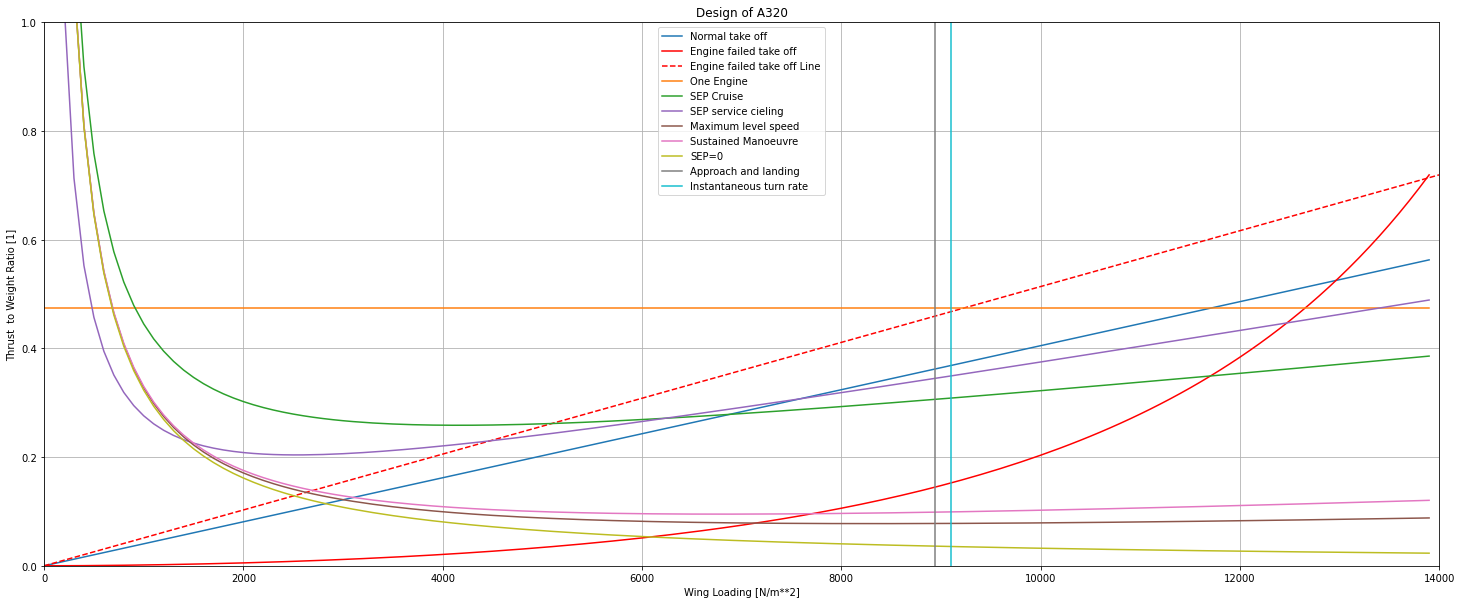

In [33]:
plt.plot(WingLoading_values, Thrust_to_weight_values, label='Normal take off', color='tab:blue')
plt.plot(WingLoading_values, T_to_W_failure_values, label='Engine failed take off' , color='r')
plt.plot([0, 14000], [0, T_to_W_failure_values[len(T_to_W_failure_values)-1]], linestyle="--", label='Engine failed take off Line' , color='r')
plt.plot(WingLoading_values, Thrust_to_weight_oneEngine_values, label='One Engine' , color='tab:orange')
plt.plot(WingLoading_values, Thrust_to_weight_SEP_Cruise_values, label='SEP Cruise' , color='tab:green',)
plt.plot(WingLoading_values, Thrust_to_weight_SEP_service_ceiling_values, label='SEP service cieling', color='tab:purple' ,)
plt.plot(WingLoading_values, Thrust_to_weight_maximum_level_speed_values, label='Maximum level speed' , color='tab:brown',)
plt.plot(WingLoading_values, Thrust_to_weight_Sustained_manoeuvre_values, label='Sustained Manoeuvre' , color='tab:pink',)
plt.plot(WingLoading_values, Thrust_to_weight_SEP0_values, label='SEP=0' , color='tab:olive',)

plt.axvline(Wing_loading_max_approach_and_landing, label = 'Approach and landing', color='tab:gray')
plt.axvline(Wing_loading_Instaneous_turn_rate, label = 'Instantaneous turn rate', color='tab:cyan')
plt.xlabel('Wing Loading [N/m**2]')
plt.ylabel('Thrust  to Weight Ratio [1]')
plt.title('Design of A320')

plt.axis([0, 14000,0, 1])
plt.rcParams["figure.figsize"] = (25,25)
plt.grid(True)
plt.legend()
plt.show()

# 7. Detailed Mass Prediction 

## 7.1 for the wing

In [11]:
velocity_D = 350 #Design diving speed in kt

N_bar1 =  1.65*n1
N_bar2 =  1.65 + (6.4 * velocity_D * S)/ (MTOM*(2/AR)*(1/math.cos(chrod_sweep)))
N_bar = max(N_bar1,N_bar2)  # Ultimate design factor 

Mass_zerofuel =62500 # Maximum zero fuel mass
Beta_w =0.1126 #Ratio of fuselage width to wing span at wing attachment section
r = 1 - (0.2+(1-(Mass_zerofuel/MTOM)))
t_to_c_root= 0.15
f_a= 1.12*(10**5)*((N_bar*(AR**1.75)*MTOM*((1+lamda)**2.5)/((math.cos(chrod_sweep))**2))**0.5)

mass_ribs = (3*(S**1.25)*(t_to_c_root**0.5)*(1-(0.34*lamda)+(0.44*(lamda**2))+(2.2*t_to_c_root*((S/AR)**0.5)*(1-lamda+ (0.72*(lamda**2))))))/(AR**0.25)
mass_WB= (MTOM * (1920*(AR**1.5)*(S**0.5)*N_bar*r*(1+lamda)))/(t_to_c_root*f_a*math.cos(chrod_sweep*math.cos(chrod_sweep)))
Mass_wing_ideal = mass_ribs+ mass_WB
Mass_LG_Attachement = 0.004 *MTOM
Mass_TED = 0.006 *0.995* MTOM
MASS_LED = 0.007 * MTOM *0.995
Mass_spoilers = 0.0015* 0.995* MTOM
Mass_fairings = 0.002*0.995*MTOM
Mass_140t = 0.005 *MTOM
F_BW = 1.13*( (1-(5*(Beta_w**2)))-(0.0027*(1+(43*Beta_w))*lamda))
Mass_wing_total = (Mass_wing_ideal + Mass_LG_Attachement+ Mass_TED+ MASS_LED+Mass_spoilers+Mass_fairings+Mass_140t)*F_BW

#Printing
print("Mass of the wing box", mass_WB,"Kg")
print("Mass of the ribs", mass_ribs,"Kg")
print("Landing gear attachment mass penalty",Mass_LG_Attachement ,"Kg")
print("Composite trailing edge devices mass penalty", Mass_TED ,"Kg")
print("Composite leading edge devices mass penalty", MASS_LED,"Kg")
print("Composite spoilers mass penalty",Mass_spoilers ,"Kg")
print("Composite fairings mass penalty",Mass_fairings ,"Kg")
print("Mass penalty for Aircraft with an MTOM under 140000kg = ",Mass_140t ,"Kg")
print("Total mass of the wing", Mass_wing_total,"Kg")
print("Ratio of fuselage width to wing span", Beta_w )
print("Body width factor", F_BW )


Mass of the wing box 3509.2074170802457 Kg
Mass of the ribs 494.20372488113225 Kg
Landing gear attachment mass penalty 312.0 Kg
Composite trailing edge devices mass penalty 465.66 Kg
Composite leading edge devices mass penalty 543.27 Kg
Composite spoilers mass penalty 116.415 Kg
Composite fairings mass penalty 155.22 Kg
Mass penalty for Aircraft with an MTOM under 140000kg =  390.0 Kg
Total mass of the wing 6308.982432983648 Kg
Ratio of fuselage width to wing span 0.1126
Body width factor 1.0539605042455837


## 7.2 for the Fuselage

In [12]:
D_FUS= B #Fuselage width
K6= 1 # Aircraft class factor
tau_bar= 0.8 + 0.05*(D_FUS-2) #Nominal tensile working stress factor
delta_p_max = 0.565 #Cabin differential pressure in bar 
Ln = 5 #Length of the fuselage where the nose nominally ends
Lt= 10 #Length of the fuselage wherein the tail diameter is reduced to 0
D1= 3.95 #Diameter at the fuselage station where the nose nominally ends
D2= 3.95  #Maximum fuselage diameter
fn = Ln/D1
ft = Lt/D2
S_FUS = math.pi * (D_FUS**2 )*( (L/D_FUS) - (fn+ft) + (0.35*((4*((fn**2)+1))**0.5))+(0.34*((4*(ft**2)+1)**0.5))  ) #
M_FUS = 2*K6*(1+((3.1-(0.354*B))*(2*tau_bar/(1+tau_bar))))*(3.56*delta_p_max*S_FUS*B/(tau_bar**0.75))

print("fn parameter = ", fn)
print("ft parameter = ", ft)
print("Fuselage surface area = ", S_FUS, "m2")
print("Corresponding nominal tensile working stress = ", tau_bar)
print("Total fuselage mass = ", M_FUS, "kg")

fn parameter =  1.2658227848101264
ft parameter =  2.531645569620253
Fuselage surface area =  421.441349448894 m2
Corresponding nominal tensile working stress =  0.8975000000000001
Total fuselage mass =  18953.534322240193 kg


## 7.3 For  the Empennage

In [13]:
velocity_dive = 350 # in kt
k12 = 1 #Vertical empennage design factor
S_H = 31 #Horizontal tail surface
S_V = 21.5 #Vertical tail surface
M_H = 0.04*velocity_dive * (S_H**1.24) 
M_V = 0.065*k12*velocity_dive * (S_V**1.15) 
print("Horizontal empennage mass = ", M_H, "kg")
print("Vertical empennage mass = ", M_V, "kg")

Horizontal empennage mass =  989.5016803052368 kg
Vertical empennage mass =  774.971318902362 kg


## 7.4 For  the landing gear

In [14]:
M_NLG = 0.005* MTOM
M_MLG = 0.035* MTOM
print("Main landing gear mass = ", M_MLG, "kg")
print("Nose landing gear mass = ", M_NLG, "kg")

Main landing gear mass =  2730.0000000000005 kg
Nose landing gear mass =  390.0 kg


## 7.5 For  the aircraft’s powerplant

In [15]:
M_powerplant = 3495.6086
M_two_powerplants = 2* M_powerplant
print("Mass of one powerplant, including installation (simple mass model) = ", M_powerplant, "kg")
print("Mass of both powerplants, including installation (simple mass model) = ", M_two_powerplants, "kg")

Mass of one powerplant, including installation (simple mass model) =  3495.6086 kg
Mass of both powerplants, including installation (simple mass model) =  6991.2172 kg


## 7.6 For  the aircraft’s systems 

In [16]:
M_HFC = 0.016*MTOM # Flight control system
M_EIA = 0.02*MTOM #  Electric aircraft systems
M_ADI = 0.02*MTOM #  Air conditioning andde-icing system
M_FUR = 0.04*MTOM #Furnishings
M_SYS = M_FUR+M_ADI+M_EIA+M_HFC 
M_powerplant = 3495.6086
M_two_powerplants = 2* M_powerplant
print("Mass of the hydraulic flight control system = ", M_HFC, "kg")
print("Mass of the electric systems, instruments and avionics = ", M_EIA, "kg")
print("Mass of the air condition and de-icing systems = ", M_ADI, "kg")
print("Mass of furnishings = ", M_FUR, "kg")
print("Total mass of systems = ", M_SYS, "kg")

Mass of the hydraulic flight control system =  1248.0 kg
Mass of the electric systems, instruments and avionics =  1560.0 kg
Mass of the air condition and de-icing systems =  1560.0 kg
Mass of furnishings =  3120.0 kg
Total mass of systems =  7488.0 kg


## 7.7 For  the aircraft’s total aircraft mass

In [18]:
OEM = Mass_wing_total + M_FUS+ M_H + M_V + M_NLG+M_MLG+M_powerplant+M_SYS 
OEM_specified = 42200
E_OEM = (OEM_specified-OEM)*100/OEM_specified
print("Total mass of aircraft [Calculated] = ", OEM, "kg")
print("Total mass of aircraft [Specifiec] = ", OEM_specified, "kg")
print("Error in total mass of aircraft calculation = +",E_OEM, "%")

Total mass of aircraft [Calculated] =  41130.598354431444 kg
Total mass of aircraft [Specifiec] =  42200 kg
Error in total mass of aircraft calculation = + 2.5341271222003696 %
